## A simple model for demand and supply of geolocalized services in a city

### Load libraries and classes

In [1]:
import os
import sys
nb_dir = os.path.dirname(os.getcwd()) ## TODO: find way to put this into some global settings
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [10]:
from references import city_settings
from src.models.city_items import ServiceType
from src.models.process_tools import ModelRunner, ValuesPlotter

In [7]:
model_settings = {
    ServiceType.School.label: {'mean_radius': 0.4, 'size_power_law': 0.4, 'private_rescaling': 1},
    ServiceType.Library.label: {'mean_radius': 0.4},
    ServiceType.TransportStop.label: {'mean_radius': 0.3},
    ServiceType.Pharmacy.label: {'mean_radius': 0.5},
}
runner = ModelRunner(model_settings, 
                 cities=[city_settings.get_city_config('Roma')],
                 services=[ServiceType.School])

In [12]:
used_calculator = runner.run()[0]


 		 Running model on: Roma 


Location data found
ServiceType.School -- dropping 1 units outside city.
Observed mean capacity 243.46 for SCUOLA PRIMARIA
Observed mean capacity 294.76 for SCUOLA SECONDARIA I GRADO
Ignoring interactions below 0.0001 

ServiceType.School Approx distance matrix in 0.0824

 Computing ServiceType.School AgeGroup.ChildPrimary
... 500 units done
AgeGroup time 1.0475

 Computing ServiceType.School AgeGroup.ChildMid
... 500 units done
AgeGroup time 0.6620
ServiceType.School: AgeGroup.ChildPrimary -- unassigned: 3206 | Total: 117904
ServiceType.School: AgeGroup.ChildMid -- unassigned: 5503 | Total: 113537

 Using available capacity for service Scuole


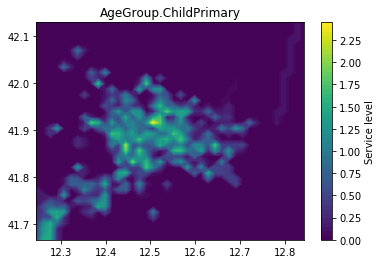

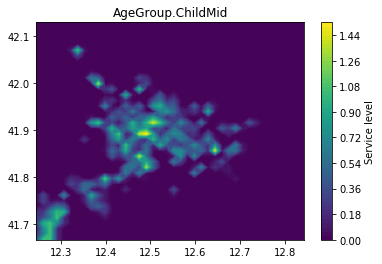

In [13]:
heat_map_plotter = ValuesPlotter(used_calculator.service_values)
heat_map_plotter.plot_service_levels(ServiceType.School)